# A projeção de Mollweide

- PET - Física
- Petiano: Gabriel Wendell Celestino Rocha
- Data: 02 de fevereiro de 2022

O objetivo deste `Notebook` é apresentar o conceito da projeção de Mollweide. Quando se trata de representar a esfera celeste em um plano global, constuma-se usar a projeção de **projeção de Mollweide**. 

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em quatro seções (três seções expositivas mais uma seção extra):

1. **Trabalhando com unidades e constantes físicas em Python (opcional);**
2. **Trabalhando com coordenadas astronômicas;**
3. **A projeção de Mollweide;**
4. **Representações da esfera celeste e do fundo cósmico de micro-ondas (CMB).**

Na primeira seção iremos explorar uma biblioteca chamada `quantities` que visa permitir ao usuário trabalhar com as mais diversas unidades físicas em Python. Tal biblioteca foi explorada no `Notebook` [A radiação do corpo negro e a radiação cósmica de fundo (CMB)](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20radiação%20do%20corpo%20negro%20e%20a%20radiação%20cósmica%20de%20fundo%20(CMB).ipynb) [1]. Como este tema já foi abordado em um `Notebook` anterior, este tópica passa a ser opcional dentro do contexto deste `Notebook` como um todo.

Na segunda seção iremos mostrar como se pode trabalhar com os diferentes sistemas de coordenadas astronômicas usando as bibliotcas Python apropriadas.

Na terceira e penúltima seção, iremos abordar uma maneira de representar graficamente a posição dos objetos na esfera celeste. Aqui iremos ver como gerar representações gráficas com a projeção de Mollweide usando a biblioteca `Matplotlib` do Python. A possibilidade de gerar este tipo de representação gráfica é bastante útil, mas como veremos, é um pouco complicada.

Por fim, na quarta e última seção, veremos uma introdução ao uso do pacote `healpy` do Python e realizar uma aplicação direta do conceito da projeção de Mollweide ao fundo cósmico de micro-ondas (CMB).

## Pré-requisitos

Com relação à duas primeiras seções deste `Notebook`, é necessário apenas que o leitor possua as habilidades básicas de programação. Entretanto, nas duas últimas seções deste `Notebook`, recomenda-se que o leitor seja conhecedor dos conceitos básicos de **astronomia de posição** e **astronomia esférica**.

### Importando as bibliotecas

In [1]:
from astroML.datasets import fetch_wmap_temperatures
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import quantities as pq
import healpy as hp
import numpy as np
import warnings
import inspect
import astropy
import astroML
import ephem

warnings.filterwarnings('ignore')
%matplotlib notebook

from IPython.core.display import HTML

Note que dessa vez importamos uma série de bibliotecas um tanto quanto incomuns. Vamos por partes...

- [`PyEphem`](https://rhodesmill.org/pyephem/) : essa biblioteca permite ao usuário calcular as posições de planetas, cometas, asteróides e satélites da Terra.

- [`Inspect`](https://docs.python.org/3/library/inspect.html) : esse pacote fornece várias funções úteis para ajudar a obter informações sobre objetos ativos, como módulos, classes, métodos, funções, tracebacks, objetos de quadro e objetos de código.

- [`AstroML`](https://www.astroml.org) : esse módulo permite a implementação rápida de ferramentas e rotinas comuns usadas para análise de dados estatísticos em astronomia e astrofísica.

- [`Astropy`](https://www.astropy.org) : essa biblioteca contém diversas funcionalidades e ferramentas comuns necessárias para estudos astronômicos e astrofísicos.

- [`Healpy`](https://healpy.readthedocs.io/en/latest/) : essae pacote fornece acesso do Python ao conjunto de funções HEALPix, que são o padrão para a representação dos dados provenientes das diferentes missões que medem a temperatura da radiação de fundo em micro-ondas do universo.

- [`Quantities`](https://pythonhosted.org/quantities/) : esse módulo é projetado para lidar com aritmética e conversões de quantidades físicas, que têm uma magnitude, dimensionalidade especificada por várias unidades e possivelmente uma incerteza atrelada.

O comando `warnings.filterwarnings('ignore')` irá suprimir alguns avisos irritantes de depreciação. Para mais detalhes acerca do módulo `warnings`, clique [aqui](https://docs.python.org/pt-br/dev/library/warnings.html).

Para instalar tais bibliotecas, basta executar uma das seguintes linhas de comando em um terminal de sua preferência:

- **PIP**: `pip install <biblioteca>`
- **Anaconda**: `conda install <biblioteca>`

O módulo `HTML` importado do [`IPyhon.core.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) servirá apenas para que possamos exibir algumas imagens do site do SDSS DR7 neste `Notebook` as incorporando como um código HTML na saída do `IPython`.

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Quantities, Healpy, NumPy, Astropy, AstroML, Ephem

Software,Version
Python,3.7.11 64bit [GCC 7.5.0]
IPython,7.23.1
OS,Linux 5.4.0 80 generic x86_64 with Zorin 15 bionic
Matplotlib,3.4.2
Quantities,0.12.4
Healpy,1.14.0
NumPy,1.19.5
Astropy,4.2.1
AstroML,0.4.1
Ephem,4.0.0.2


Para instalar a magic extension `%version_information` do `IPython` usando o `pip`, execute a seguinte linha de comando em um terminal de sua preferência:

`pip install version_information`

Feito todas essas explicações, vamos ao `Notebook` propriamente dito.

## 1. Trabalhando com unidades e constantes físicas em Python

Existem vários pacotes Python que permitem trabaLhar com unidades e constantes físicas. Minha preferência pessoal é o pacote `[quantities]`. O seu uso é particularmente simples e natural e tem um nível de funcionalidade suficiente (pelo menos ao meu ver).

A primeira pergunta que pode ser levantada é: *por que preciso usar a minha linguagem de programação preferida para suportar unidades físicas?* Bem, suponha que em um determinado momento se atribua a uma variável o valor de um comprimento igual a 3 medido em metros. Em outro momento se cria outra variável com um comprimento de 5 medido em pés. Em seguida, adiciona-se os dois valores. Sem uma verificação de unidade física, obteríamos um resultade de 8, sem sentido e errado em qualquer sistema de unidades. Vamos imaginar que estejamos usando com o pacote `quantities` para isso:

In [3]:
x = 3 * pq.m
y = 5 * pq.foot

print(x + y)

4.524 m


Como pode ser visto, obtemos um resultado correto expresso em metros.

Mas... quem iria pensar em somar metros e pés? Bem, em 1998, a sonda espacial [Mars Climate Orbiter (MCO)](https://solarsystem.nasa.gov/missions/mars-climate-orbiter/in-depth/) [2] da NASA se desintegrou na atmosfera marciana porque o software para a estação de rastreamento na Terra usava o sistema anglo-saxão de unidades (polegadas, pés e libras) enquanto o software a bordo da nave utilizou, conforme as especificações, o sistema métrico decimal (melímetros, metros, quilômetros e quilos), sem realizar as conversões exigidas.

Claro que existem muitas outras possibilidades de erro ao trabalhar com grandezas que expressam magnitudes com unidades físicas. Em particular, a coerência dimensional pode não ser respeitada. Suponha, por exemplo, que inadvertidamente, pretendemos adicionar duas quantidades, uma representando uma magnitude de força (em Newtons) e outra de energia (em Joules):

In [4]:
x = 3.5 * pq.newton
y = 0.7 * pq.joule

try:
    # Retorna um erro se for realizada uma operação ilegal com essas unidades
    x + y 
except Exception as e:
    print(u'*** WARNING: ***', e)

*** WARNING: *** Unable to convert between units of "J" and "N"


Neste caso, as quantidades geraram uma exceção que nos alerta sobre a inconsistência dimensional da operação que desejamos realizar.

A utilidade das grandezas vai muito além, pois permite ao intérprete controlar as unidades compostas nas quais se expressa o resultado de um cálculo e realizar automaticamente as devidas conversões para que o resultado seja correto. Isso significa que podemos inserir os valores das magnitudes nas unidades que são mais confortáveis para nós a qualquer momento:

In [5]:
x = 0.3 * pq.km     # Comprimento em Km
t = 250 * pq.ms     # Tempo em milisegundos

mass = 7 * pq.g     # Massa em gramas
acel = x/t ** 2

force = mass * acel

print('F =', force)

F = 3.36e-05 g*km/ms**2


Podemos solicitar que o resultado seja expresso no sistema de unidades base (SI por padrão):

In [6]:
print('F =', force.simplified)

F = 33.599999999999994 kg*m/s**2


Ou que seja expresso em alguma unidade derivada, desde que seja respeitada a coerência dimensional:

In [7]:
print('F =', force.rescale(pq.newton))
print('F =', force.rescale(pq.dyne))

F = 33.599999999999994 N
F = 3359999.999999999 dyn


O importante é que as unidades corretas sejam computadas em todos os cálculos intermediários, realizando as devidas conversões automaticamente, e nos notificando se em algum momento cometermos um erro dimensional. Além disso, o resultado final pode ser expresso nas unidades que desejamos, desde que sejam dimensionalmente compatíveis com as unidades computadas.

### 1.1 Unidades mais utilizadas em Astronomia

Já vimos alguns exemplos elementares do uso de unidades físicas com o pacote de quantidades. Em astronomia seu uso pode ser paticularmente útil devido à diversidade das unidades utilizadas. Abaixo indicaremos alguns dos mais comuns. Também mostraremos a expressão "simplificada" para poder verificar o valor numérico em unidades do SI:

#### Unidades de tempo e distâncias

In [8]:
print(pq.year)
print(pq.au, '=', pq.au.simplified)
print(pq.light_year, '=', pq.light_year.simplified)
print(pq.pc, '=', pq.pc.simplified)

1 yr (year)
1 au (astronomical_unit) = 149597870691.0 m
1 ly (light_year) = 9460730472580800.0 m
1 pc (parsec) = 3.08568025e+16 m


#### Unidades de temperatura

In [9]:
print(pq.K)
print(pq.celsius)

1 K (Kelvin)
1 degC (Celsius)


Mas tome cuidado, pois as quantidades não se convertem entre as escalas de temperatura absoluta  e temperaturas em graus, pois isso implica levar em conta um ponto de referência (zero absoluto) para o qual a embalagem não está preparada. As temperaturas são sempre consideradas diferenças de temperatura.

Neste vemos que a conversão não é realizada:

In [10]:
Temp = 345 * pq.celsius

print(Temp.rescale(pq.K))

345.0 K


A conversão entre as escalas Fahrenheit e Celsius abaixo também não está correta. Porém, se o valor for considerado como um aumento de temperatura, o resultado está correto:

In [11]:
Temp = 170 * pq.fahrenheit

print(Temp.rescale(pq.celsius))

94.44444444444444 degC


#### Medidas de ângulos

In [12]:
print(pq.deg)
print(pq.rad)
print(pq.arcmin)
print(pq.arcsec)

1 deg (arcdegree)
1 rad (radian)
1 arcmin (arcminute)
1 arcsec (arcsecond)


Vamos a alguns exemplos de uso de unidades angulares:

In [13]:
print((np.pi/2 * pq.rad).rescale(pq.deg))

90.0 deg


In [14]:
print((1 * pq.deg).rescale(pq.arcmin))

60.0 arcmin


É possível definir novas unidades que não existem no pacote:

In [15]:
Mly = pq.UnitQuantity('megalight_year', 1e6*pq.ly, symbol = 'Mly')
Mpc = pq.UnitQuantity('megaparsec', 1e6*pq.pc, symbol = 'Mpc')

Por exemplo, quantos anos-luz existem em megaparsec?

In [16]:
print((1 * Mpc).rescale(pq.ly))

3261566.5977832843 ly


No exemplo acima, pode-se ver que a unidade recém-definida não faz parte do espaço de nomes de `quantities`, ou seja, escrevemos `Mpc`, não `pq.Mpc`.

### 1.2 Constantes

O pacote `quantities` também possui um amplo repertório de constantes físicas. A título de exemplo, citaremos o seguinte, de interesse em astronomia:

In [17]:
print(pq.c, pq.c.simplified)
print(pq.constants.G, pq.constants.G.simplified)

1 c (speed_of_light) 299792458.0 m/s
1 G (Newtonian_constant_of_gravitation) 6.67428e-11 m**3/(kg*s**2)


E novas constantes podem ser definidas. Eu particularmente uso as seguintes:

In [18]:
earth_radius = 6378160.0 * pq.m
moon_radius = 1740000.0 * pq.m
sun_radius = 695000000.0 * pq.m
earth_mass =  5.97219e24 * pq.kg
sun_mass = 332946 * earth_mass
Hubble_constant = 67.80 * (pq.km/pq.s)/(1e6*pq.pc)

### 1.3 Suporte do NumPy

Uma grande qualidade do pacote `quantities` é que ele é totalmente compatível com os arrays do `NumPy`. O tipo de unidades em um array pode ser definido:

In [19]:
xa = np.arange(10) * pq.N

Cada elemento do array acima terá unidades em Newton:

In [20]:
print(xa[5])

5.0 N


E as operações com arrays são suportadas: no exemplo a seguir, dividindo o array acima por uma magnitude de massa, todos os elementos do array terão unidades de aceleração:

In [21]:
print((xa/(30 * pq.kg)).simplified)

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3       ] m/s**2


Às vezes é necessário obter o valor numérico da variável sem incluir o tipo de unidade. Isso pode ser feito de duas maneiras, dependendo se queremos obter um valor numérico ou um array do `NumPy`:

In [22]:
f = 30 * pq.N

print(f.item(), type(f.item()))
print(xa.magnitude, type(f.magnitude))

30.0 <class 'float'>
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] <class 'numpy.ndarray'>


### 1.4 Explorando o conteúdo do pacote `quantities`

O pacote `quantities.units` inclui um grande número de unidades organizadas em uma série de submódulos, um para cada tipo de unidade. Podemos listar os diferentes submódulos usando o pacote `inspect` da seguinte forma:

In [23]:
for name, data in inspect.getmembers(pq.units, inspect.ismodule):
    print(name, ',',)

acceleration ,
angle ,
area ,
compound ,
concentration ,
electromagnetism ,
energy ,
force ,
frequency ,
heat ,
information ,
length ,
mass ,
power ,
prefixes ,
pressure ,
radiation ,
substance ,
temperature ,
time ,
velocity ,
viscosity ,
volume ,


Abaixo está uma lista dos nomes das unidades em cada pacote. Por exemplo, para ver quais são as unidades do tipo `mass`:

In [24]:
for u in dir(pq.mass):
    print(u, ',',)

Da ,
UnitMass ,
__builtins__ ,
__cached__ ,
__doc__ ,
__file__ ,
__loader__ ,
__name__ ,
__package__ ,
__spec__ ,
absolute_import ,
amu ,
apdram ,
apothecary_ounce ,
apothecary_pound ,
apounce ,
appound ,
atomic_mass_unit ,
avoirdupois_ounce ,
avoirdupois_pound ,
bag ,
carat ,
dalton ,
denier ,
dr ,
drachm ,
dram ,
dtex ,
dwt ,
g ,
gr ,
grain ,
gram ,
kg ,
kilogram ,
lb ,
long_hundredweight ,
long_ton ,
metric_ton ,
mg ,
milligram ,
ounce ,
oz ,
pennyweight ,
pound ,
scruple ,
short_hundredweight ,
short_ton ,
slug ,
slugs ,
st ,
stone ,
t ,
tex ,
ton ,
tonne ,
toz ,
troy_ounce ,
troy_pound ,
u ,


O outro pacote importante é o pacote de constantes:

In [25]:
for name, data in inspect.getmembers(pq.constants, inspect.ismodule):
    print(name, ',',)

_codata ,
_utils ,
astronomy ,
atomicunits ,
deuteron ,
electromagnetism ,
electron ,
helion ,
mathematical ,
muon ,
naturalunits ,
neutron ,
proton ,
quantum ,
relationships ,
statisticalmechanics ,
tau ,
triton ,
weak ,
xray ,


E para ver, por exemplo, o conteúdo do módulo de constantes astronômicas:

In [26]:
dir(pq.constants.astronomy)

['G',
 'Newtonian_constant_of_gravitation',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'astronomical_unit',
 'au']

---

## 2. Trabalhando com coordenadas astronômicas

Agora vamos aprender a trabalhar com os diferentes sistemas de coordenadas astronômicas usando as bibliotecas Python apropriadas para isso.

### 2.1 Coordenadas esféricas equatoriais

Elas são definidas por uma ascensão reta (ra), uma declinação (dec) e uma época.

`O ra é normalmente representado como uma string na forma "hh:mm:ss"`

`O dec é normalmente representado como uma string no formato "+/-º:':''"`

`A época padrão é J2000.0`

Seus elementos são:

- A origem é o centro da Terra (ou seja, são coordenadas geocêntricas).
- O plano fundamental é a projeção do equador na esfera celeste.
- A direção primária é a do equinócio vernal em uma determinada data (a época).
- A convenção de direção é que ra é medido positivamente para leste e norte.

As coordenadas equatoriais de um objeto são representadas em `ephem` como instâncias da classe Equatorial.

Lembre que ra, dec e época são atributos do objeto. Vamos definir as coordenadas equatoriais de um objeto:

In [27]:
eq = ephem.Equatorial('13:24:42.5', '-60:15:59.4')

Internamente são armazenados em radianos, para facilitar os cálculos:

In [28]:
eq.ra, eq.dec, eq.epoch

(3.511202483725676, -1.0518488536531627, 36525.0)

No entanto, eles são impressos como `strings`:

In [29]:
print(eq.ra, '\t', eq.dec, '\t', eq.epoch)

13:24:42.50 	 -60:15:59.4 	 2000/1/1 12:00:00


Podemos obter uma tupla `(ra, dec)` usando o método `get()`:

In [30]:
print(eq.get())

(3.511202483725676, -1.0518488536531627)


Indicamos em qual constelação uma certa tupla de coordenadas está localizada:

In [31]:
ephem.constellation((eq.ra, eq.dec))

('Cen', 'Centaurus')

Também podemos usar outra época diferente de `J2000`:

In [32]:
eq50 = ephem.Equatorial('13:24:42.5', '-60:15:59.4', epoch = ephem.B1950)

print(eq50.ra, '\t', eq50.dec, '\t', eq50.epoch)

13:24:42.50 	 -60:15:59.4 	 1949/12/31 22:09:50


### 2.2 Coordenadas galácticas

É também um sistema de coordenadas esféricas. Seus elementos são:

- O centro está localizado no S0l (são coordenadas heliocêntricas)
- O plano fundamental é aproximadamente o plano da nossa galáxia (a Via Láctea)
- A direção primária aponta aproximadamente para o centro da nossa galáxia
- A convenção é que as direções são positivas ao norte e leste no plano fundamental

As coordenadas são longitude (lon / l) e latitube (lat / b), ambas expressas em graus, não em horas. Começamos definindo as coordenadas galáctivas de um objeto:

In [33]:
ga = ephem.Galactic('1:59:55.9', '+89:59:59.9')

print(ga.lon, ga.lat)

1:59:55.9 89:59:59.9


Agora obtemos a longitude e a latitude usando o método `get()`. Os resultados são exibidos em radianos:

In [34]:
print(ga.get())

(0.0348867076789611, 1.5707958419812156)


### 2.3 Conversão entre sistemas de coordenadas

As coordenadas podem ser convertidas entre um sistema e outro passando um objeto do primeiro tipo como entrada para uma classe do segundo tipo, Vamos realizar uma conversão de coordenadas equatoriais entre épocas como exemplo:

In [35]:
eq1 = eq = ephem.Equatorial('13:24:42.5', '-60:15:59.4')
eq2 = ephem.Equatorial(eq1, epoch = ephem.B1950)

print(eq1.get())
print(eq2.get())

(3.511202483725676, -1.0518488536531627)
(3.49702212460356, -1.04730555904456)


Agora realizamos uma conversão de coordenadas galáctivas para coordenadas equatoriais. Na verdade esta declaração de época pode ser omitida:

In [36]:
ga1 = ephem.Galactic('0', '90', epoch = ephem.J2000)
eq1 = ephem.Equatorial(ga1)

print(eq1.ra, eq1.dec)

12:51:26.28 27:07:41.7


### 2.4 Obtenção das coordenadas de um objeto pelo nome

Para isso, será utilizado o módulo `SkyCoord` da biblioteca `astropy.coordinates` com o sufixo `from_name`, que obtém as coordenadas do servidor [SESAME](http://cds.u-strasbg.fr/cgi-bin/Sesame).

O "Sistema Internacional de Referência Celestial" (ICRS) é o sistema de referência celeste atualmente adotado como padrão pela União Astronômica Internacional (IAU). Estas coordenadas coincidem com as coordenadas equatoriais J2000.0. As coordenadas do ICRS ("icrs" é a opção padrão) podem ser obtidas dando o nome do objeto em qualquer um dos catálogos utilizados pelo serviço SESAME.

In [37]:
SkyCoord.from_name("M51")

<SkyCoord (ICRS): (ra, dec) in deg
    (202.469575, 47.19525833)>

Definimos agora o mesmo objeto em coordenadas galácticas:

In [38]:
SkyCoord.from_name("M51", frame = 'galactic')

<SkyCoord (Galactic): (l, b) in deg
    (104.85158476, 68.56070178)>

Para acessar os valores dos ângulos (longitude e latitude neste caso) existem várias opções:

In [39]:
c = SkyCoord.from_name("M51", frame = 'galactic')

A longitude e a latitude podem ser acessadas internamente com `c.l` e `c.b`. A representação interna dos ângulos está em graus. No entanto, esses valores não podem ser operados diretamente:

In [40]:
c.l, c.b

(<Longitude 104.85158476 deg>, <Latitude 68.56070178 deg>)

E para obter valores numéricos dos ângulos com os quais operar, basta proceder da seguinte maneira:

In [41]:
c.l.degree + 90

print(c.l.radian, c.b.radian)
print(c.l.degree, c.b.degree)

1.8300053799146436 1.196609983605786
104.85158475534386 68.56070178383017


No caso de coordenadas ICRS, os ângulos coordenados são ra e dec:

In [42]:
c = SkyCoord.from_name("M51", frame = 'icrs')

Vamos realizar uma representação na forma de uma `string` que por sua vez não é adequada para operação:

In [43]:
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (202.469575, 47.19525833)>


Fornecemos uma tupla de "horas", "minutos", "segundos" e expressamos os valores em graus:

In [44]:
print(c.ra.hms)
print(c.dec.degree)

hms_tuple(h=13.0, m=29.0, s=52.69800000000572)
47.19525833


Vamos expressar esses valores em graus e em outros tipos de unidades:

In [45]:
print(c.ra.radian)
print(c.dec.radian)

3.533760718863598
0.8237126491877805


Outro sistema de coordenadas fornecido pela biblioteca `astropy` e o FK5. É um sistema de coordenadas equatoriais baseado no Epoch J2000, que praticamente coincide com as coordenadas do ICRS:

In [46]:
c_ICRS = SkyCoord.from_name("M51", frame = "icrs")
c_FK5 = SkyCoord.from_name("M51", frame = 'fk5')

print('Coordenadas ICRS:', c_ICRS.ra.hms, c_ICRS.dec.degree)
print('Coordenada FK5:', c_FK5.ra.hms, c_FK5.dec.degree)

Coordenadas ICRS: hms_tuple(h=13.0, m=29.0, s=52.69800000000572) 47.19525833
Coordenada FK5: hms_tuple(h=13.0, m=29.0, s=52.697952632948244) 47.19525810680161


### 2.5 Conversão entre sistemas de coordenadas com `astropy`

Obtemos as coordenadas galácticas de uma estrela. Vamos escolher uma estrela do hemisfério sul:

In [47]:
c = SkyCoord.from_name('Achernar', frame = 'galactic')
c

<SkyCoord (Galactic): (l, b) in deg
    (290.8412417, -58.79200969)>

Convertemos para as coordenadas equatoriais FK5:

In [48]:
c.fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (24.42851975, -57.23675279)>

E inversamente, das coordenadas do ICRS obtemos as coordenadas galácticas:

In [49]:
c = SkyCoord.from_name('Achernar', frame = 'icrs')
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    (290.8412417, -58.79200969)>

---

## 3. A projeção de Mollweide

Vamos fazer primeiro um exemplo de projeção de Mollweide usando as bibliotecas `NumPy` e `Matplotlib` da maneira mais padrão possível. No gráfico a seguir vamos representar três retângulos curvilíneos com $\Delta RA=60º$ de base e $\Delta\delta=45º$ de altura em três posições diferentes:

<IPython.core.display.Javascript object>


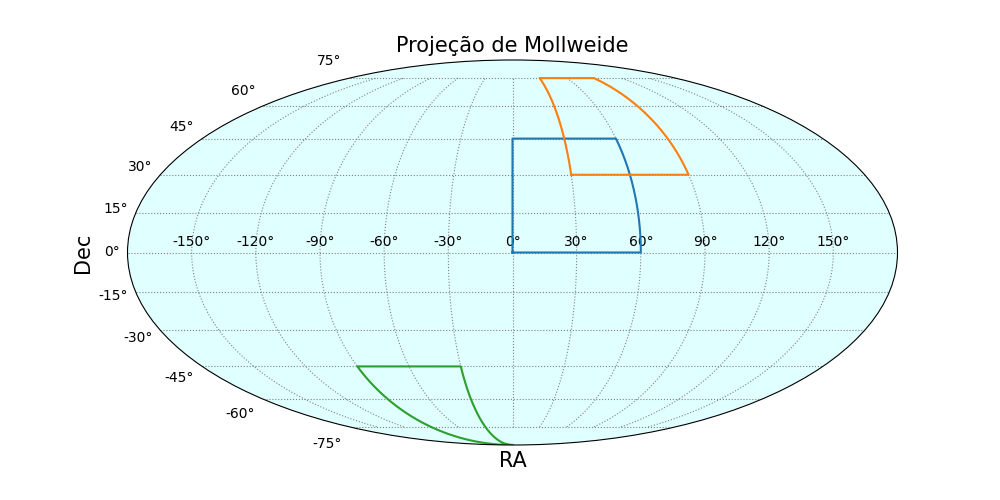

In [50]:
r = 90
theta = np.arange(0, 2*np.pi, 0.1)
x = np.array([0, np.pi/3, np.pi/3, 0, 0])
y = np.array([0, 0, np.pi/4, np.pi/4, 0])

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111, projection = "mollweide", facecolor = 'LightCyan')
ax.grid(True, linestyle = ':', color = '0.50')
ax.plot(x, y)
ax.plot(x + np.pi/6,y + np.pi/6)
ax.plot(x - np.pi/2,y - np.pi/2)
ax.set_title('Projeção de Mollweide')
ax.title.set_fontsize(15)
ax.set_xlabel("RA")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel("Dec")
ax.yaxis.label.set_fontsize(15)

plt.savefig('Projeção de Mollweide.png', dpi = 400)

As lições que podemos extrair do exemplo acima são as seguintes:

- Os valores $x$ e $y$, que normalmente serão ascedentes e declinações retas, ou então longitudes e latitudes, devem ser expressos em radianos. Os valores $x$ e $y$ devem estar no intervalo: $-\pi<x<\pi$, $-\frac{\pi}{2}<y<\frac{\pi}{2}$. Pudemos verificar que valores que ultrapassam esse intervalo (por exemplo, $x=\frac{3\pi}{2}$ não aparecem no gráfico.

- A escala dos eixos na representação gráfica abrange os intervalos $[-180º,180º]$ e $[-90º,90º]$, respectivamente, ou seja, a representação gráfica traduz os valores em radianos em valores em graus nesses intervalos.

- Outro fato significativo que teremos que levar em conta nas projeções astronômicas é que na escala horizontal do gráfico gerado a direção positiva é para direita, enquanto nas representações astronômicas a ascensão reta aumenta em direção ao Leste (convencionalmente localizada à esquerda em cartas celestes).

- A escala horizontal está centrada em $x=0$, o que deve ser levado em consideração, pois nas representações da esfera celeste às vezes é interessante colocar o centro em $RA=90º$ ou em $RA=180º$.

Levando em conta todos esses pontos, vamos escrever uma função que representará um par de arrays de valores (tipicamente RA e Dec) em um gráfico de dispersão de pontos na esfera celeste com a projeção de Mollweide:

In [51]:
def plot_mwd(RA, Dec, org = 0, title = u'Projeção de Mollweide', projection = 'mollweide', name_fig = 'Nome.png'):
    '''
    Inputs:
    - RA: array que assume valors em [0º, 360º);
    - Dec: array que assume valores em [-90º, 90º];
    - org: origem do gráfico, 0 é múltiplo de 360º, no intervalo [0º, 360º);
    - title: título do gráfico;
    - projection: tipo de projeção ('mollweide', 'aitoff', 'hammer', 'lambert')
    - name_fig: nome da figura ao ser salvo na extensão .png
    '''
    
    x = np.remainder(RA + 360 - org, 360) 
    ind = x > 180
    x[ind] -= 360   
    x = -x    
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels + 360 + org, 360)
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111, projection = projection, facecolor = 'LightCyan')
    ax.scatter(np.radians(x), np.radians(Dec))  
    ax.set_xticklabels(tick_labels)     
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True, linestyle = ':', color = '0.50')
    plt.savefig(name_fig, dpi = 400)

Vamos testar a função `plt_mwd` fazendo uma representação centrada em $RA=90º$ de alguns pares de coordenadas expressas em graus e verificando se estão representadas na posição correta:

<IPython.core.display.Javascript object>


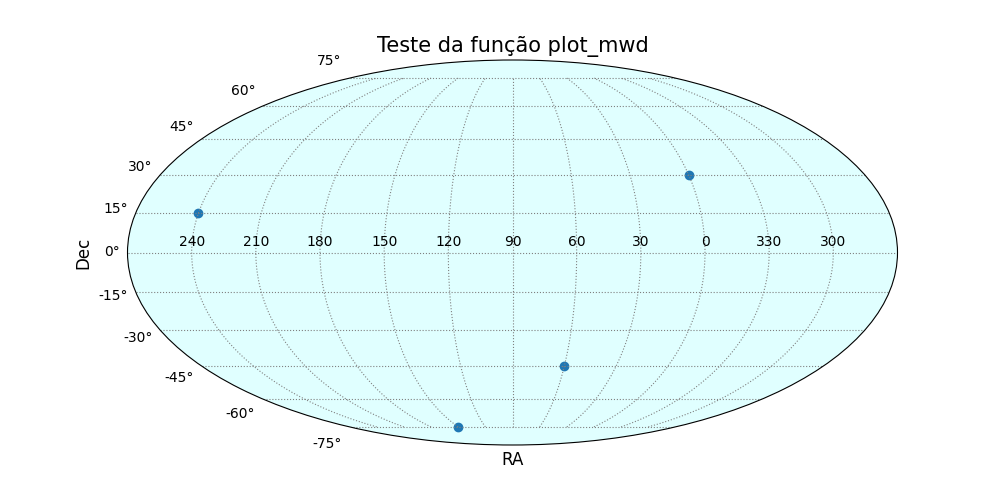

In [52]:
coord = np.array([(0,30), (60,-45), (240,15), (150,-75)])
plot_mwd(coord[:,0], coord[:,1], org = 90, title = u'Teste da função plot_mwd', name_fig = 'Teste - plot_mwd.png')

Finalmente vamos representar um array de pares de coordenadas geradas aleatoriamente:

<IPython.core.display.Javascript object>


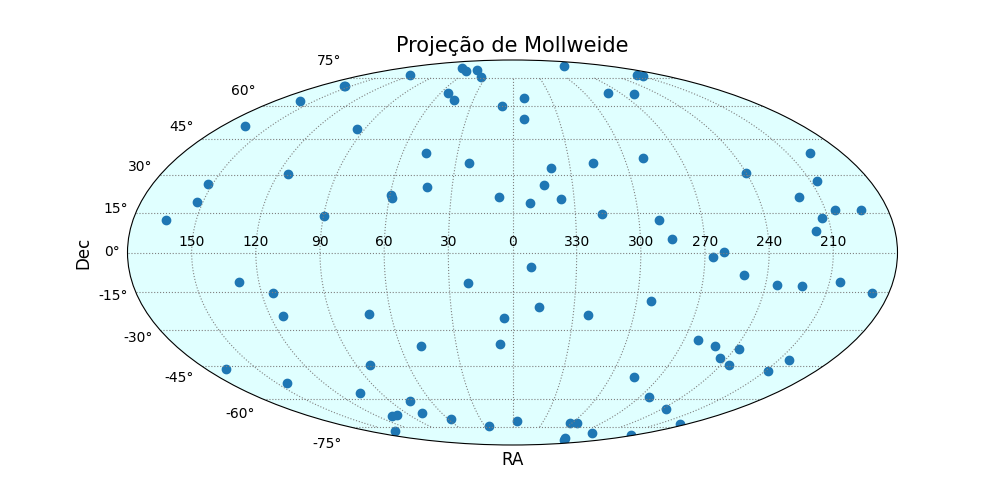

In [53]:
np.random.seed(0)
nrand = np.random.rand(100,2)    
nrand *= np.array([360.,180.]) 
nrand -=np.array([0.,90.]) 
# A linha de código abaixo é para evitar o erro 'Matplotlib Runtime Warning'
nrand = nrand[(-86 < nrand[:,1]) & (nrand[:,1] < 86)]
                               
RA = nrand[:,0]
Dec = nrand[:,1]
plot_mwd(RA, Dec, name_fig = 'Projeção de Mollweide - Random.png')

A título de curiosidade, vamos nos perguntar como seria o plano de nossa galáxia, ou seja, a Via Láctea, em um gráfico da esfera celeste em coordenadas equatoriais RA, Dec.

O plano galáctico é aquele com coordenada de latitude $b=0$ no sistema de coordenadas galácticas. Vamos gerar um array de coordenadas galácticas de latitude 0 e convertê-lo em coordenadas equatoriais com a biblioteca `ephem`:

<IPython.core.display.Javascript object>


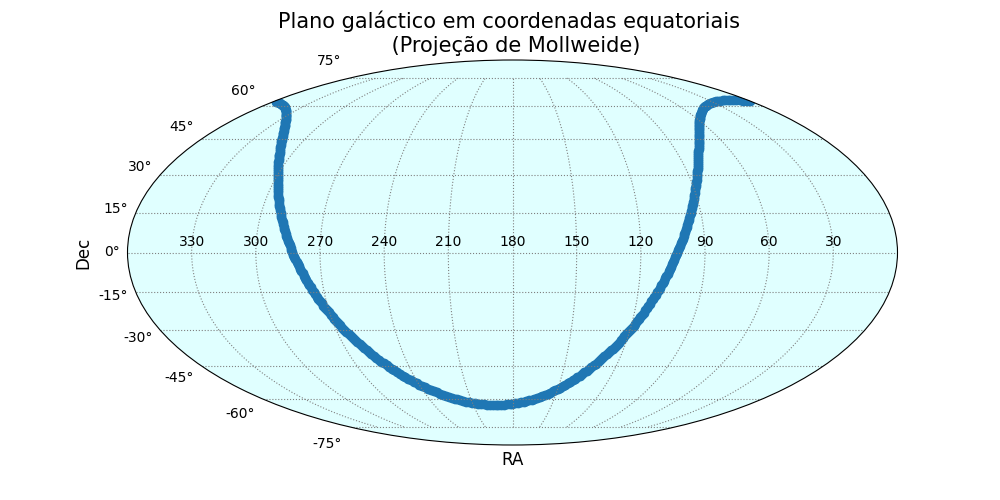

In [54]:
lon_array = np.arange(0, 360)
lat = 0.
eq_array = np.zeros((360, 2))

for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon), np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
    
RA = eq_array[:,0]
Dec = eq_array[:,1]
plot_mwd(RA, Dec, 180, 
        title = u'Plano galáctico em coordenadas equatoriais \n (Projeção de Mollweide)',
        name_fig = 'Plano galáctico (RA, Dec - Mollweide).png')

### 3.1 Projeção de Aitoff

Outro sistema de projeção que ocasionalmente é encontrado e que também é usado na Astronomia para representar uma visão global da esfera celeste é a **projeção de Aitoff**. Parece semelhante à de Mollweide, mas ao contrário dele, as linhas de latitude igual (paralelas) são representadas por linhas curvas, e estas são espaçadas regularmente.

<IPython.core.display.Javascript object>


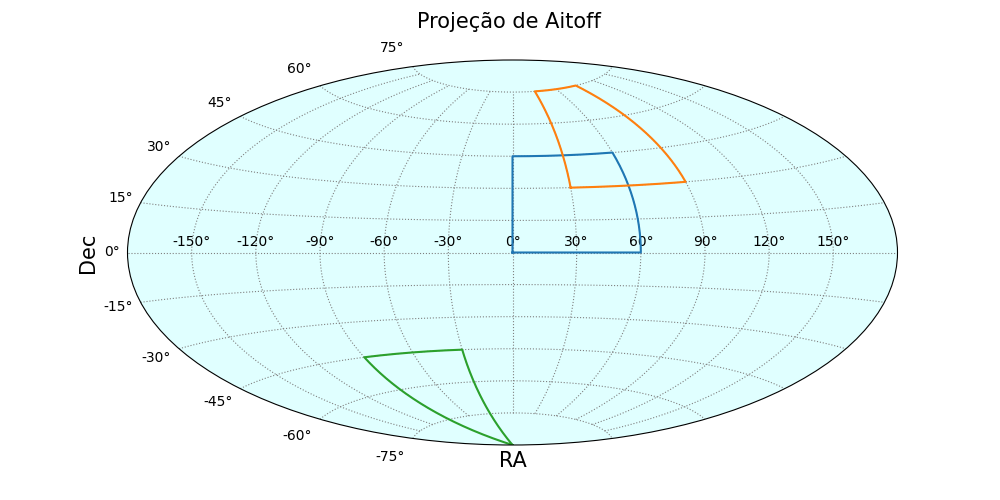

In [55]:
r = 90
theta = np.arange(0, 2*np.pi, 0.1)
x = np.array([0, np.pi/3, np.pi/3, 0, 0])
y = np.array([0, 0, np.pi/4, np.pi/4, 0])

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111, projection = "aitoff", facecolor ='LightCyan')
ax.grid(True, linestyle = ':', color = '0.50')
ax.plot(x, y)
ax.plot(x + np.pi/6, y + np.pi/6)
ax.plot(x - np.pi/2, y - np.pi/2)
ax.set_title('Projeção de Aitoff \n')
ax.title.set_fontsize(15)
ax.set_xlabel("RA")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel("Dec")
ax.yaxis.label.set_fontsize(15)

plt.savefig('Projeção de Aitoff.png', dpi = 400)

Vamos gerar a imagem do plano galáctico na projeção de Aitoff:

<IPython.core.display.Javascript object>


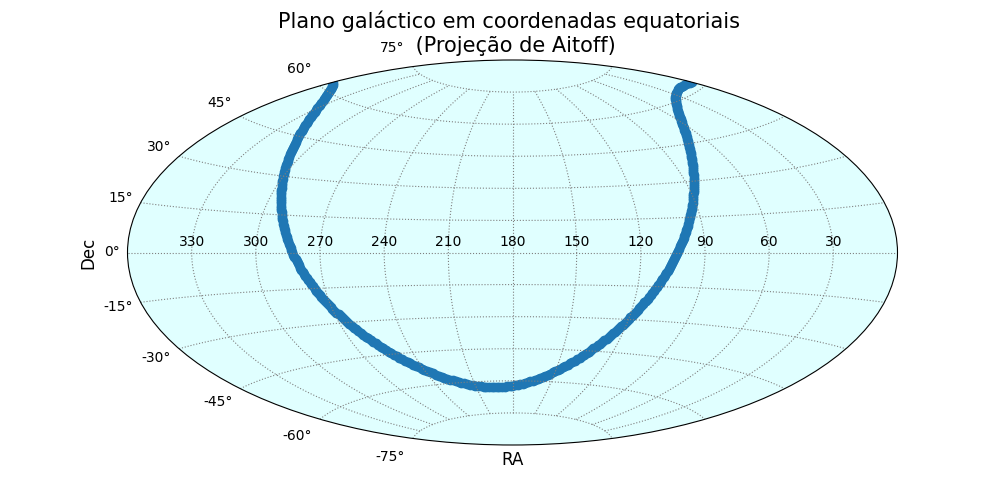

In [56]:
lon_array = np.arange(0, 360)
lat = 0.
eq_array = np.zeros((360, 2))

for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon), np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
    
RA = eq_array[:,0]
Dec = eq_array[:,1]
plot_mwd(RA, Dec, 180, title = u'Plano galáctico em coordenadas equatoriais \n (Projeção de Aitoff)', 
         projection = 'aitoff', name_fig = 'Plano galáctico (RA, Dec - Aitoff).png')

E como exemplo da utilização deste sistema de projeção, podemos comparar o mapa anterior com o mapa de cobertura do DR7 de divulgação dos dados do *Sloan Digital Sky Survey* (SDSS), que pode ser consultado na cobertura do [DR7 SDSS](http://classic.sdss.org/dr7/) [3], que é apresentado em uma projeção de Aitoff centrada em $RA=180º$.

#### Legacy DR7 Imaging Sky Coverage (projeção Aitoff das coordenadas equatoriais)

In [57]:
HTML('<img src="http://classic.sdss.org/dr7/dr7photo_big.gif" WIDTH=500>')

#### SEGUE DR7 Imaging Sky Coverage (projeção Aitoff das coordenadas equatoriais)

In [58]:
HTML('<img src="http://classic.sdss.org/dr7/seguephoto_big.gif" WIDTH=500>')

### 3.2 A projeção de Mollweide conserva as áreas

Uma propriedade característica da projeção de Mollweide, que a torna especialmente útil para representar a distribuição global de objetos ou mgnitudes na esfera celeste e ter uma ideia de sua densidade, é que, embora não preserve formas ou ângulos, preserva áreas, isto é, áreas iguais no globo celeste são representadas por áreas iguais na projeção de Mollweide. A projeção de Aitoff não possui esta propriedade.

Para verificar visualmente este fato, vamos representar uma série de retângulos de igual área. Por retângulos entenderemos neste caso áreas delimitadas entre dois meridianos e dois paralelos celestes. Procederemos da seguinte forma:

Em primeiro lugar, chamamos de $\theta$ o arco meridiano que delimita a extensão de uma calota esférica centrada no pólo celeste norte, usaremos o fato de que a área da dita calota é proporcional a $1-\cos{\theta}$. Este fato decorre da fórmula para calcular a área de uma calota esférica, $\pi(a^{2}+h^{2})$, juntamente com um pouco de trigonometria elementar.

Usaremos este fato para estabelecer uma série de valores de ângulos de declinação Dec que indicam paralelos tais que a área entre esses paralelos seja a mesma em todos os casos (isso implica em particular que os paralelos em questão não serão equidistantes).

Por fim, subdividiremos essas áreas em retângulos delimitados por meridianos espaçados de $\frac{\pi}{6}$ ($30º$). As regiões retangulares resultantes terão todas a mesma área.

In [59]:
theta_1 = 30./180 * np.pi

Criamos um array com os valores de $\theta$ (ângulo medido a partir do pólo norte - N) e marcamos a delimitação de regiões entre paralelos celestes:

In [60]:
theta_a = np.zeros(7)

for n in range(0,7):
    theta_n = np.arccos(n*np.cos(theta_1) - n+1)
    theta_a[n] = theta_n
    
theta_a

array([0.        , 0.52359878, 0.74946887, 0.92969779, 1.08817621,
       1.23435819, 1.37336376])

Convertemos os valores de declinação e as medidas do equador celeste:

In [61]:
dec_a = np.pi/2 - theta_a
dec_a

array([1.57079633, 1.04719755, 0.82132746, 0.64109854, 0.48262011,
       0.33643813, 0.19743257])

E finalmente representamos as 6 regiões retangulares de área igual:

<IPython.core.display.Javascript object>


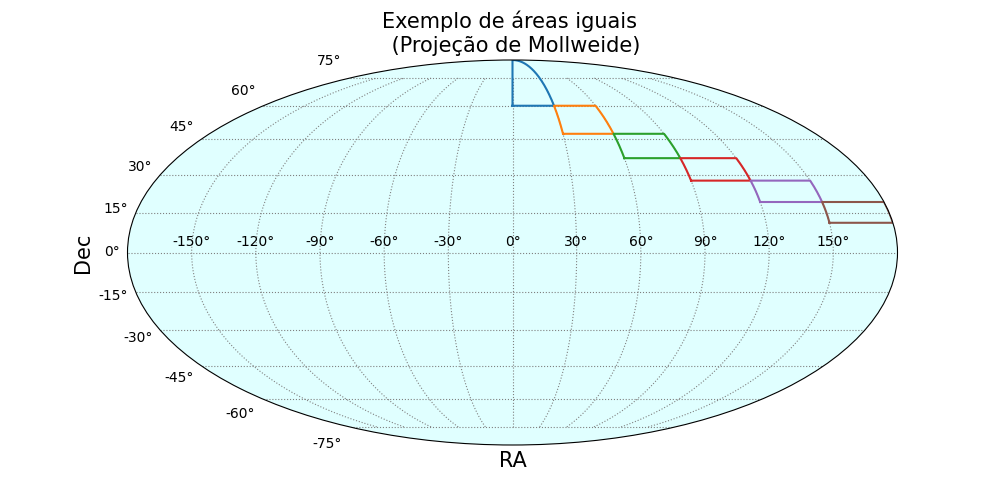

In [62]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111, projection = "mollweide", facecolor = 'LightCyan')
ax.set_title(u'Exemplo de áreas iguais \n (Projeção de Mollweide)')
ax.grid(True, linestyle = ':', color = '0.50')

for n in range(6):
    rec_n = np.array([(n* np.pi/6, dec_a[n+1]),
                      ((n +1) * np.pi/6, dec_a[n+1]),
                      ((n +1) * np.pi/6, dec_a[n]),
                      (n* np.pi/6, dec_a[n]),
                      (n* np.pi/6, dec_a[n+1])])
    x = rec_n[:,0]
    y = rec_n[:,1]
    ax.plot(x,y)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(15)
    plt.savefig('Áreas iguais.png', dpi = 400)

Na figura anterior vê-se como a altura dos retângulos na representação de Mollweide se estreita para compensar o aumento da largura à medida que nos aproximamos do equador celeste, de modo que as áreas de todas as regiões são idênticas entre si, assim como são na realidade.

---

## 4. Representações da esfera celeste e do fundo cósmico de micro-ondas (CMB).

O [`Healpy`](https://pypi.org/project/healpy/) fornece acesso do Python ao conjunto de funções [HEALPix](https://healpix.sourceforge.io) (*Hierarchical Equal Area isoLatitude Pixelation*). Costumeiramente, quando se deseja representar graficamente os dados advindos das várias missões espaciais que visavam medir a temperatura da radiação cósmica de fundo em micro-ondas do universo, geralmente se usava o conjunto de funções do HEALPix. 

O HEALPix (*Hierarchical Equal Area isoLatitude Pixelation*) fornece um algoritmo para subdividr a esfera em elementos de imagem (pixels) com a propriedade de todos eles representam exatamente a mesma área da superfície esférica original, e esses pixels também são distribuídos ao longo de linhas de igual latitude. Esta subdivisão pode então ser traduzida em uma projeção planar como a de Mollweide que preserva as áreas na representação planar resultante.

Ter representações gráficas da superfície esférica com pixels de mesma área é fundamental para a apresentação e posterior análise da distribuição de massas, energia, radiação, etc., permitindo comparar densidades relativas e aplicar diferentes algoritmos. Em particular, a biblioteca HEALPix foi inicialmente desenvolvida para representar a distribuição da radiação de fundo cósmico em micro-ondas, cujos dados foram coletados em várias missoes, embora seu uso tenha sido posteriormente estendido a outros campos.

### 4.1 Uso de coordenadas e numeração de pixels

No `healpy`, as coordenadas esféricas são usadas para posicionar os pixels: o ângulo polar $\theta$ medido a partir do Pólo Norte (colatitude), que toma valores no intervalo $[0,\pi]$, e o ângulo azimutal $\varphi$ (longitude) que toma valores no intervalo $[0,2\pi]$, medido em direção ao leste do globo.

A resolução da subdivisão em pixels é definida com o parâmetro `NSIDE`.

A função `nside2npix(NSIDE)` retorna o número de pixels em que a superfície esférica será decomposta para um determinado `NSIDE`. A resolução mínima é de 12 pixels, e cada vez que o `NSIDE` é dobrado (que deve ser sempre uma potência de 2) cada pixel é subdividido em 4, conforme mostra a tabela a seguir:

In [63]:
for NSIDE in 2.**np.arange(6):
    print(u'O número de pixels para NSIDE = %2d é: %5d' %(NSIDE, hp.nside2npix(NSIDE)))

O número de pixels para NSIDE =  1 é:    12
O número de pixels para NSIDE =  2 é:    48
O número de pixels para NSIDE =  4 é:   192
O número de pixels para NSIDE =  8 é:   768
O número de pixels para NSIDE = 16 é:  3072
O número de pixels para NSIDE = 32 é: 12288


Os pixels são numerados por padrão de acordo com o esquema RING, que consiste em numerá-los consecutivamente ao longo de anéis de latitude constante, começando pelo anel de pixels mais ao norte.

A função `pix2ang(nside, ipix)` retorna as coodenadas angulares para um determinado número de pixels ou um array de números de pixels. Observe que $\theta$ está entre $0$ e $\pi$ radianos e $\varphi$ está entre $0$ e $2\pi$ radianos. Vamos ver um exemplo de uso desta função:

In [64]:
NSIDE = 1
ipix = np.arange(hp.nside2npix(NSIDE))
print(u'A numeração dos pixels para NSIDE = %d é: \n' %NSIDE, ipix)

theta, phi = hp.pix2ang(NSIDE, ipix)
print('\n array theta =', theta/np.pi, 'radianos')
print('\n array phi =', phi/np.pi, 'radianos')

A numeração dos pixels para NSIDE = 1 é: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]

 array theta = [0.26772047 0.26772047 0.26772047 0.26772047 0.5        0.5
 0.5        0.5        0.73227953 0.73227953 0.73227953 0.73227953] radianos

 array phi = [0.25 0.75 1.25 1.75 0.   0.5  1.   1.5  0.25 0.75 1.25 1.75] radianos


Por outro lado, a função `ang2pix(nside, theta, phi)` retorna a numeração dos pixels para determinadas coordenadas angulares $(\theta,\varphi)$, que, como antes, podem ser coordenadas individuais ou dois arrays separados.

In [65]:
NSIDE = 1
hp.ang2pix(NSIDE, np.pi/2, np.pi)

6

Vamos ver o que acontece agora se usarmos dois arrays com as coordenadas angulares:

#### Caso de arrays de mesmo tamanho: combina elemento por elemento

In [66]:
theta = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4])
phi = np.array([0, np.pi/2, np.pi, 3*np.pi/2])

hp.ang2pix(NSIDE, theta, phi)

array([ 0,  1,  6, 11])

#### Caso de arrays de tamanhos diferentes: retorna um erro

In [67]:
theta = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4])
phi2 = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4, 3.5*np.pi/2])

try: 
    hp.ang2pix(NSIDE, theta, phi2)
except Exception as e:
    print(u'WARNING:', e)

Mas se por exemplo, mudamos o array `theta` para um array de colunas, a transmissão do `NumPy` é possível e um array 2D é retornado com o número de pixels:

In [68]:
theta2 = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4]).reshape(-1, 1)
phi2 = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4, 3.5*np.pi/2])

hp.ang2pix(NSIDE, theta2, phi2)

array([[ 0,  0,  1,  1,  3],
       [ 0,  0,  1,  1,  3],
       [ 4,  5,  5,  6,  4],
       [ 8,  8,  9,  9, 11]])

### 4.2 Representação gráfica usando a projeção de Mollweide

A função para representar graficamente um array de pixels na projeção de Mollweide é `mollview()`. Para ser renderizado com `mollview()`, o array deve ser unidimensional e seu comprimento deve corresponder a `nside2npix(NSIDE)`. Cada elemento do array corresponderá a um pixel na decomposição do HEALPix. Vejamos um exemplo:

<IPython.core.display.Javascript object>


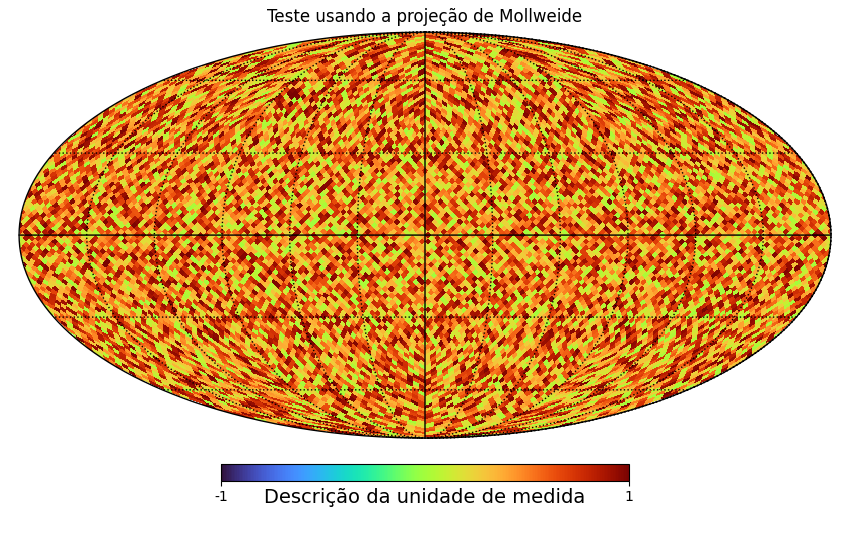

In [69]:
npixels = hp.nside2npix(32)
np.random.seed(0)
test = np.random.rand(npixels)

hp.mollview(test, min = 0, max = 0,
           title = u'Teste usando a projeção de Mollweide',
           unit = u'Descrição da unidade de medida',
           cmap = 'turbo')
hp.graticule()

plt.savefig('Teste: hp.mollview.png', dpi = 400)

Podemos ver o esquema de numeração de pixels no exemplo a seguir, que por sua vez nos permitirá introduzir as funções `projscatter()` e `projtext()`. O esquema padrão que será usado é o "RING":

<IPython.core.display.Javascript object>


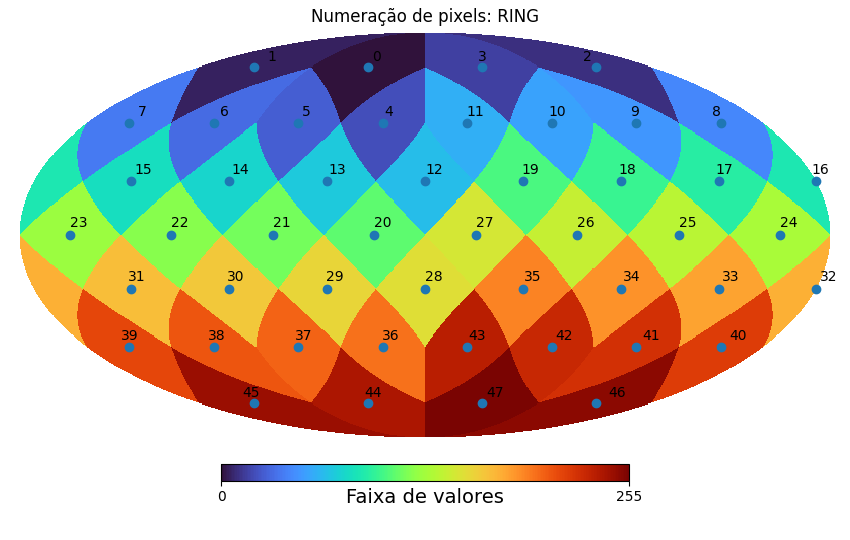

In [70]:
NSIDE = 2
npixels = hp.nside2npix(NSIDE)
img = np.linspace(0, 255, num = npixels)
index = np.arange(npixels)
theta, phi = hp.pix2ang(NSIDE, index)

hp.mollview(img, min = 0, max = 255, 
            title = u'Numeração de pixels: RING', unit = u'Faixa de valores', cmap = 'turbo')
hp.projscatter(theta, phi)
for i in index:
    hp.projtext(theta[i] - 0.05, phi[i], i)

plt.savefig('Numeração de pixels: RING.png', dpi = 400)

Observe que, no esquema anterior, a ordem de representação dos pixels é de cima (Norte) para baixo (Sul) e da direita (Oeste) para a esquerda (Leste), conforme corresponde a uma projeção da abóbada celeste, em que o leste está à esquerda. Se o leitor desejar representar um mapa geográfico, com o Leste à direita, será necessário usar a opção `flip = 'geo'`.

O `Healpy` trabalha internamente com as coordenadas angulares $\theta$ e $\varphi$ em radianos, mas o usuário também pode fornecer as coordenadas em outros sistemas, por exemplo, em coordenadas galácticas (lon, lat) ou coordenadas equatoriais (RA, Dec). Por esta razão, as funções `projscatter()` e `projtext()` suportam a opção `lonlat = True`, que indica que as coordenadas fornecidas não são $\theta$ (colatitude) e $\varphi$ (longitude) em radianos, mas longitude e latitude em graus. Por exemplo, em coordenadas equatoriais as coordenadas angulares seriam uma ascensão reta e uma declinação.

Vamos ver um exemplo disso.

<IPython.core.display.Javascript object>


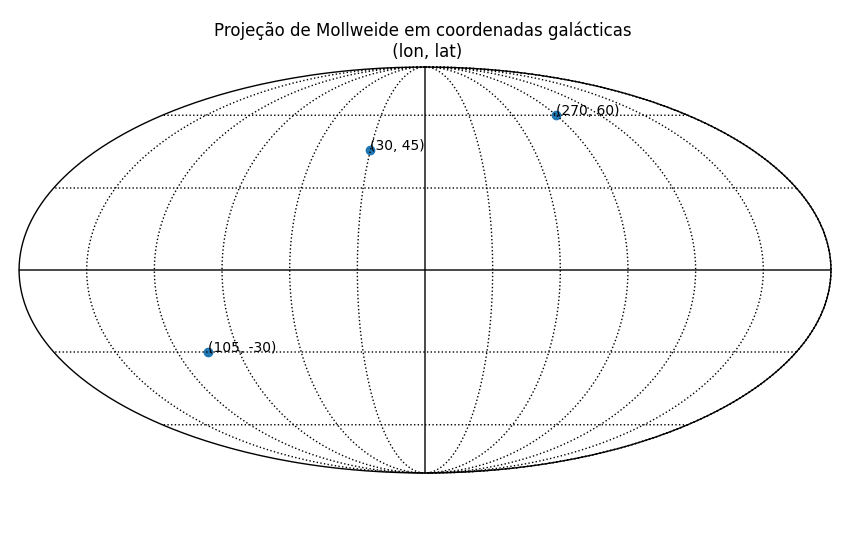

In [71]:
lon = [30, 105, 270]
lat = [45, -30, 60]

hp.mollview(title = "Projeção de Mollweide em coordenadas galácticas \n (lon, lat)")
hp.graticule()    
hp.projscatter(lon, lat, lonlat = True)
hp.projtext(30, 45,'(30, 45)', lonlat = True)
hp.projtext(105, -30,'(105, -30)', lonlat = True)
hp.projtext(270, 60,'(270, 60)', lonlat = True)

plt.savefig('Projeção de Mollweide (lon, lat).png', dpi = 400)

Lembre-se que o Leste está representado à esquerda da figura.

### 4.3 Download e exibição dos dados da radiação do fundo cósmico de micro-ondas (CMB) da missão WMAP

Para acessar os dados de fundo em micro-ondas cósmicas do WMAP, usaremos o módulo [`astroML`](http://www.astroml.org) do Python. A função para preparar um array para gráficos com healpy é:

`astroML.datasets.fetch_wmap_temperatures()`

Duas versões desses dados podem ser baixadas: uma versão "completa" que inclui frequências contaminantes, principalmente radiação da nossa própria galáxia ou outras fontes extragalácticas, ou uma versão em que as bandas de frequência onde essa contaminação está concentrada foram mascaradas.

Vamos baixar os dados desmascarados, por exemplo:

In [72]:
wmap_unmasked = fetch_wmap_temperatures(masked = False)
wmap_unmasked.shape

(3145728,)

Esses dados estão na forma de um array `NumPy` já preparados para gráficos com o `Healpy`. Pode-se verificar que o nível de resolução gráfica corresponde a um `NSIDE = 512`.

In [73]:
hp.nside2npix(512)

3145728

Passemos agora à sua representação gráfica:

<IPython.core.display.Javascript object>


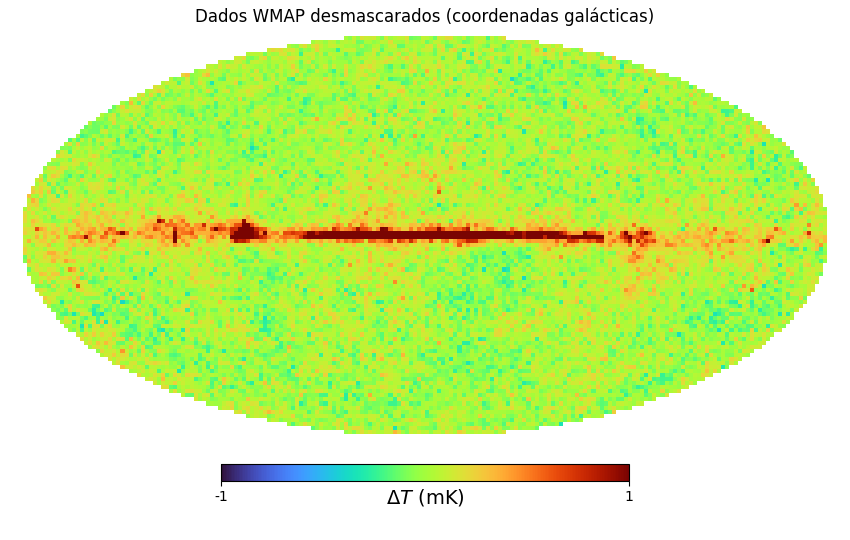

In [74]:
hp.mollview(wmap_unmasked, min = -1, max = 1, 
            title = u'Dados WMAP desmascarados (coordenadas galácticas)',
            unit = r'$\Delta T$ (mK)', xsize = 200, cmap = 'turbo')

plt.savefig('Dados WMAP desmascarados (lon, lat).png', dpi = 400)

A disposição dos pixels no array anterior corresponde ao sistema de coordenadas galácticas, como podemos verificar pela presença no gráfico, na posição lat = 0, de uma banda de poluição térmica proveniente de nossa galáxia. Isso é irrelevante quando se trata da construção da representação gráfica do `Healpy`, pois se limita a ler o array e colocar cada pixel na posição que lhe corresponde no sistema de numeração adotado (RING por padrão) e de acordo com o nível de resolução indicado pelo comprimento do array.

No entanto, podemos dizer ao `Healpy` que estamos trabalhando em um determinado sistema de coordenadas e queremos fazer uma alteração em um sistema de coordenadas diferente. O `Healpy` pode trabalhar com três tipos de coordenadas: 

- `G`: Galáctica;
- `E`: Eclíptica;
- `C`: Celestial.

Por exemplo, se quisermos redesenhar o gráfico convertendo as coordenadas galácticas em equatoriais, usaremos a opção: `coord = 'GC'`.

Além disso, podemos até rodar o gráfico anterior para, por exemplo, centrar a origem em RA, dec = $(180º,0º)$, obtendo assim um mapa em que a situação da "Via Láctea" pode ser vista em coordenadas equatoriais centradas em $RA=180º$.

<IPython.core.display.Javascript object>


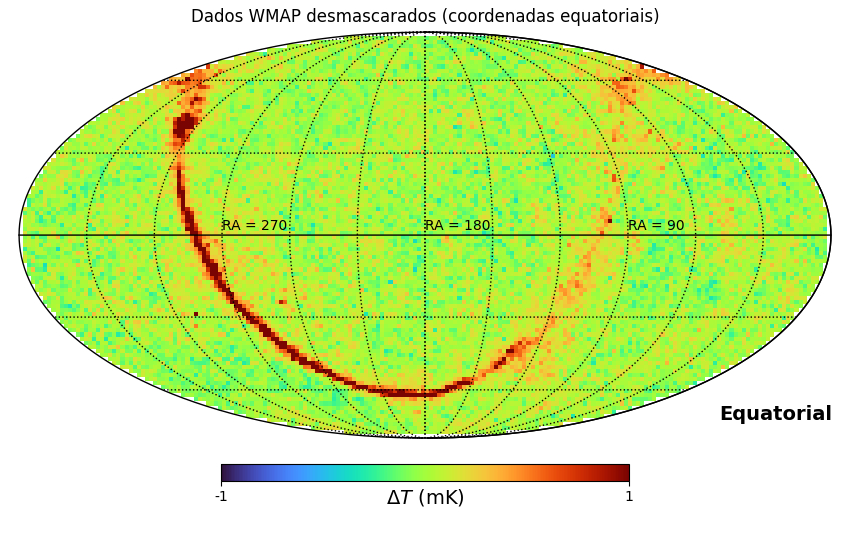

In [75]:
hp.mollview(wmap_unmasked, min = -1, max = 1,
           title = u'Dados WMAP desmascarados (coordenadas equatoriais)',
           coord = 'GC', rot = (180, 0),
           unit = r'$\Delta T$ (mK)', xsize = 200, cmap = 'turbo')
hp.graticule()

hp.projtext(180, 2, 'RA = 180', lonlat = True)
hp.projtext(90, 2, 'RA = 90', lonlat = True)
hp.projtext(270, 2, 'RA = 270', lonlat = True)

plt.savefig('Dados WMAP desmascarados (RA, Dec).png', dpi = 400)

---

## Referências

- [1] *A radiação do corpo negro e a radiação cósmica de fundo (CMB)*: https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20radiação%20do%20corpo%20negro%20e%20a%20radiação%20cósmica%20de%20fundo%20(CMB).ipynb 

- [2] *Mars Climate Orbiter:* https://solarsystem.nasa.gov/missions/mars-climate-orbiter/in-depth/

- [3] *SDSS Data Release 7 (SDSS DR7):* http://classic.sdss.org/dr7/

---